# Introduction to Neural Networks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [10, 6]

---

## Perceptron

### AND Perceptron

<div>
    <center><img src="images/and_percp.png" width="750px"></center>
</div>

Set the weights (`weight1`, `weight2`) and bias (`bias`) to values that will correctly determine the AND operation as shown above.

In [2]:
# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 1
bias = -1.5


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.5                    0          Yes
       0          1                  -0.5                    0          Yes
       1          0                  -0.5                    0          Yes
       1          1                   0.5                    1          Yes


### NOT Perceptron

Unlike the other perceptrons we looked at, the NOT operation only cares about one input. The operation returns a `0` if the input is `1` and a `1` if it's a `0`. The other inputs to the perceptron are ignored.

In [3]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -1
bias = 0.5


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.5                    1          Yes
       0          1                  -0.5                    0          Yes
       1          0                   0.5                    1          Yes
       1          1                  -0.5                    0          Yes


### XOR Perceptron

<div>
    <center><img src="images/xor_percp.png" width="750px"></center>
</div>

### Build an XOR Multi-Layer Perceptron

<div>
    <center><img src="images/xor_nn.png" width="700px"></center>
</div>

### Coding the Perceptron Algorithm

Time to code! In this quiz, you'll have the chance to implement the perceptron algorithm to separate the following data.

Recall that the perceptron step works as follows. For a point with coordinates $(p,q)$, label $y$, and prediction given by the equation $\hat{y} = \text{step}(w_1x_1 + w_2x_2 + b)$:

- If the point is correctly classified, do nothing.
- If the point is classified positive, but it has a negative label, subtract $\alpha \cdot (p, q, 1)$ from $(w_1, w_2, b)$.
- If the point is classified negative, but it has a positive label, add $\alpha \cdot (p, q, 1)$ to $(w_1, w_2, b)$.

Feel free to play with the parameters of the algorithm (number of epochs, learning rate, and even the randomizing of the initial parameters) to see how your initial conditions can affect the solution!

In [4]:
data = np.loadtxt('percep.csv', delimiter=',')
X = data[:,:-1]
y = data[:,-1]

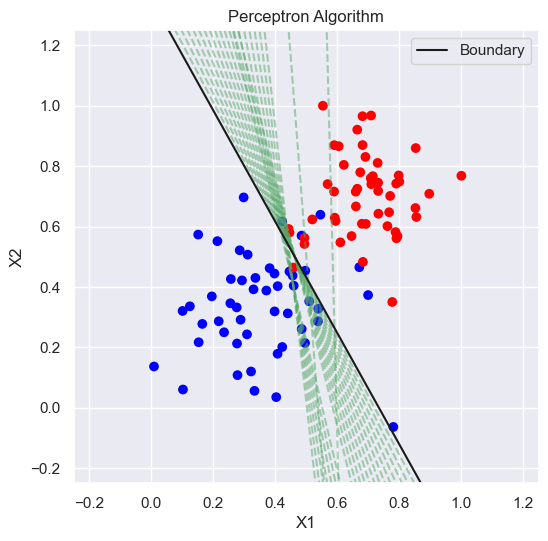

In [5]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(X.shape[0]):
        yhat = prediction(X[i,:], W, b)
        if yhat - y[i] == 1:
            W[0] -= learn_rate * X[i,0]
            W[1] -= learn_rate * X[i,1]
            b -= learn_rate
        elif yhat - y[i] == -1:
            W[0] += learn_rate * X[i,0]
            W[1] += learn_rate * X[i,1]
            b += learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

lines = trainPerceptronAlgorithm(X, y)

xs = np.linspace(0, 1)
fig, ax = plt.subplots(figsize=(6,6))
for i, (k, b) in enumerate(lines):
    ys = k[0]*xs + b[0]
    if i != len(lines)-1:
        ax.plot(xs, ys, 'g--', alpha=.5)
    else:
        ax.plot(xs, ys, 'k-', label='Boundary')
ax.scatter(X[:,0], X[:,1], c=pd.Series(y).replace({0:'red', 1:'blue'}))
ax.set_xlim(-0.25, 1.25)
ax.set_ylim(-0.25, 1.25)
ax.set_title('Perceptron Algorithm')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.legend()
pass

---

## Error Function

<div>
    <center><img src="images/error_func.png" width="750px"></center>
</div>

- In order for us to do gradient descent, our error function needs to be **continuous** (cannot be discrete).
- Mountain Errorest is continuous since small variations in our position will translate to small variations in the height.
- But the Aztec pyramid does not since the height *jumps* from 2 to 1 and then from 1 to 0.
- Discrete
$$
y=\begin{cases}
1 & x\geq0\\
0 & x<0
\end{cases}
$$
- Continuous
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

---

## Coding Softmax

In [6]:
# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    exp_scores = np.exp(L)
    return (exp_scores / exp_scores.sum()).tolist()

In [7]:
softmax([5, 6, 7])

[0.09003057317038046, 0.24472847105479764, 0.6652409557748219]

---

## Coding Cross-Entropy

$$
\begin{aligned}
\text{Cross-Entropy} &= - \sum_{i=1}^m{y_i \cdot \log(p_i) + (1-y_i) \cdot \log(1-p_i)} \\
&= -\sum_{i=1}^m{\left[ \sum_{j=1}^k{y_{ij} \cdot \log(p_{ij})} \right]}
\end{aligned}
$$

- Intuition: how likely is it that a set of events happen based on a set of probabilities.
    - If it is very likely, then we have a small cross-entropy
    - If it is unlikely, then we have a large cross-entropy.

In [8]:
# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    y = np.array(Y, dtype=np.float)
    p = np.array(P, dtype=np.float)
    return -1 * (y*np.log(p) + (1-y)*np.log(1-p)).sum()

In [9]:
cross_entropy(Y=[1,0,1,1], P=[0.4,0.6,0.1,0.5])

4.828313737302301

---

## Logistic Regression

$$
\text{Error}(W, b) = -\frac{1}{m} \sum_{i=1}^m{\left[ y_i \cdot \log\left(\sigma\left(Wx^{(i)} + b\right)\right) + (1-y_i) \cdot \log\left(1-\sigma\left(Wx^{(i)} + b\right)\right) \right]}
$$

### Why the gradient is the direction of steepest ascent?

- Directional Derivative of Multivariable Function ($\left\Vert \mathbf{v} \right\Vert = 1$)
$$
\Delta f\left(x,y\right) = \left\langle \nabla f\left( x_0, y_0 \right) , \mathbf{v} \right\rangle
$$
- Direction of Steepest Ascent: **the gradient**
$$
\arg\max_{\left\Vert \mathbf{v} \right\Vert = 1} \left\langle \nabla f\left( x_0, y_0 \right) , \mathbf{v} \right\rangle = \frac{\nabla f\left( x_0, y_0 \right)}{\left\Vert \nabla f\left( x_0, y_0 \right) \right\Vert}
$$

### Gradient Descent

- Sigmoid Function
$$
\sigma(z) = \frac{1}{1+e^{-z}}, \qquad \sigma'(z) = \sigma(z) \cdot (1-\sigma(z))
$$
- Prediction
$$
\hat{y} = \sigma(Wx + b), \qquad \frac{\partial \hat{y}}{\partial w_j} = \hat{y}\cdot(1-\hat{y})\cdot x_j, \qquad \frac{\partial \hat{y}}{\partial b} = \hat{y}\cdot(1-\hat{y})
$$
- Error Function (special case: $m=1$)
$$
\begin{aligned}
E &= -y\log\left(\hat{y}\right) - (1-y)\log\left(1-\hat{y}\right) \\
\frac{\partial E}{\partial w_j} &= -\frac{y}{\hat{y}}\cdot\frac{\partial\hat{y}}{\partial w_{j}}+\frac{1-y}{1-\hat{y}}\cdot\frac{\partial\hat{y}}{\partial w_{j}} \\
&=-\left( y - \hat{y} \right)\cdot x_j \\
\frac{\partial E}{\partial b}&=-\frac{y}{\hat{y}}\cdot\frac{\partial\hat{y}}{\partial b}+\frac{1-y}{1-\hat{y}}\cdot\frac{\partial\hat{y}}{\partial b} \\
&=-\left(y-\hat{y}\right) \\
\Rightarrow \nabla E &= -\left(y - \hat{y}\right) \cdot \left(x_1,x_2,\cdots,x_{n_x},1\right)^\intercal
\end{aligned}
$$
- Gradient Descent Step
$$
\left[\begin{array}{c} W' \\ b' \end{array}\right] \leftarrow \left[\begin{array}{c} W \\ b \end{array}\right] - \alpha \cdot \nabla E
$$
- Gradient Descent Algorithm
    - (1) start with random weights: $w_1, w_2, \cdots, w_{n_x}, b$
    - (2) update weights using the "Gradient Descent Step"
    - (3) repeat until the error is small

---

## Backpropagation

In a nutshell, backpropagation will consist of:

- Doing a feedforward operation.
- Comparing the output of the model with the desired output.
- Calculating the error.
- Running the feedforward operation backwards (backpropagation) to spread the error to each of the weights.
- Use this to update the weights, and get a better model.
- Continue this until we have a model that is good.

---